## 準備

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Duplicate key in file PosixPath('/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : Hiragino sans')


In [2]:
# 動作環境の確認
# print(pd.__version__)
# print(np.__version__)
print(sns.__version__)
print(matplotlib.__version__)
!python3 --version

0.11.2
3.5.2
Python 3.8.5


In [3]:
penguins = sns.load_dataset('penguins')

公式ドキュメントはhttps://seaborn.pydata.org/generated/seaborn.move_legend.html である。  
以下では、公式ドキュメント内の例をそのまま実行している。

## axis-level 関数における、move_legend()の使い方

move_legendの第1引数にax（matplotlib.axes.Axes オブジェクト）を指定すれば良い。

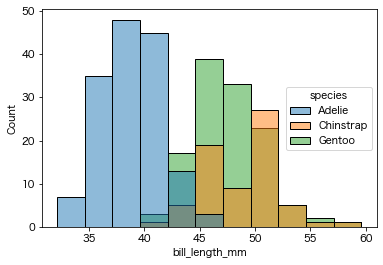

In [4]:
ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "center right")

……公式サイトに載ってるのと図のスタイルが違うのが気になるが、まぁ良いや。  
位置として"center right"を指定して、そのとおりに上下は中央・左右は右端に凡例が移動した。

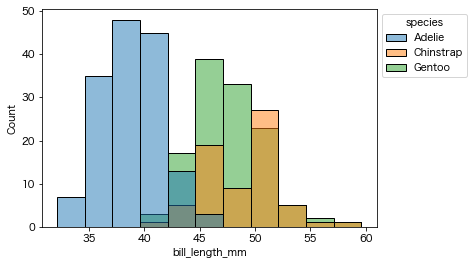

In [5]:
ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

bbox_to_anchor=(1, 1)は「凡例を図の右上に配置せよ」である。
位置指定文字列のlocが"upper left"なので、凡例の左上の隅を図の右上に合わせるということで、上図の結果になる。

つまり、

* bbox_to_anchorを指定しない場合（1つ目の例）は、位置指定文字列は「凡例を図中のどの位置に配置するか」を示す
* bbox_to_anchorを指定しない場合（1つ目の例）は、位置指定文字列は「凡例のどの位置を、図のbbox_to_anchorに合わせるか」を示す

ってことか。（これはseaborn側ではなく、marplotlib側の仕様である：[公式ドキュメント](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) ）   
ガラッと意味が変わってくるからちょっと違和感があるなぁ。

最後の例。

[matplotlib.axes.Axes.legend()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)のパラメータを渡すことで、凡例の設定を変更することができる。  
以下の例では、このような設定にしている。

* ncol=3 → 列数を3にする
* title=None → タイトル（この例では"species"）を表示しない
* frameon=False → 凡例の周囲の四角い枠を表示しない

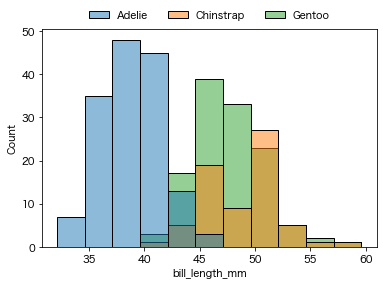

In [6]:
ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

## move_legend関数ができる前はどうやって設定してた?

! 未解決。 
0.11.2より前でこれを実現したい人は、StackOverflowとか https://qiita.com/skotaro/items/7fee4dd35c6d42e0ebae とかを読んでくれ

失敗例を説明する。

seabornのhistplotがmatplotlib.axes.Axesオブジェクトを返すので、それに対してlegendメソッドを呼び出せばいいと思うが、それでは失敗する。

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


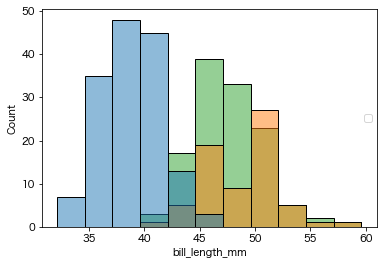

In [7]:
# 注意：失敗例です
ax = sns.histplot(penguins, x="bill_length_mm", hue="species")
# この時点では凡例は右上に表示されています。環境によって位置が変わるかも。
ax.legend(loc="center right")
# 上の業の代わりに plt.legend(loc="center right") としても同じ結果になる。

警告文の示すとおり、
labelを持っているartistが1つもないので、legendを表示しようとしたけど何も表示できません。となっている。  
その結果、グラフの右側を見ると、小さな四角だけが表示されている。これはlegendを生成したけど、その中に入れるものが何もなかったからだろう。  

……えっ。じゃあ何でseabornは最初にlegendを表示できたの……?  
それはlabelをseabornの内部で与えたからじゃないの……?  

In [8]:
print(ax)
print(type(ax))

print(ax.patches)
print(type(ax.patches))

AxesSubplot(0.125,0.125;0.775x0.755)
<class 'matplotlib.axes._subplots.AxesSubplot'>
<Axes.ArtistList of 33 patches>
<class 'matplotlib.axes._base._AxesBase.ArtistList'>


In [9]:
print(ax.patches[5])
print(type(ax.patches[5]))

Rectangle(xy=(44.6, 0), width=2.5, height=39, angle=0)
<class 'matplotlib.patches.Rectangle'>


In [10]:
ax.legend

<bound method Axes.legend of <AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>>

https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position の一番上の答えにあったコードを、
今回のグラフに合わせて書き換えてみたけど、これも同様に失敗する。

0.11.2 よりも前のバージョンだと上手く行ってたのかなぁ。少なくとも0.11.2ではダメ。

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


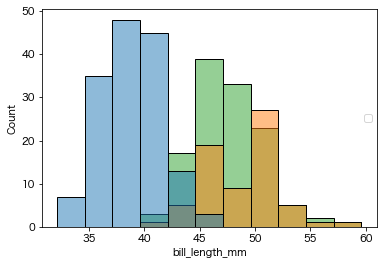

In [11]:
# 注意：失敗例です
import matplotlib.pyplot as plt

ax = sns.histplot(penguins, x="bill_length_mm", hue="species", legend=False)

plt.legend(loc="center right")

## figure-level関数におけるmove_legend()の使い方

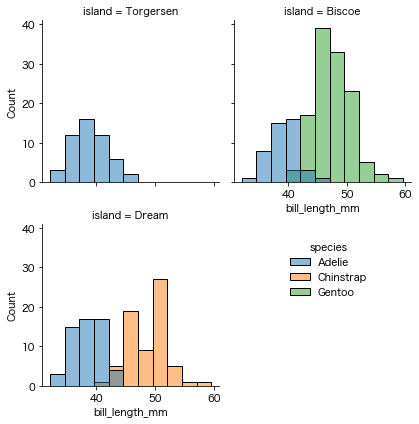

In [12]:
g = sns.displot(
    penguins,
    x="bill_length_mm", hue="species",
    col="island", col_wrap=2, height=3,
)
sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45))

plt.savefig("aa.png")



つまり、このfigureの輪郭はグラフが収まる大きさよりも右側に余白があるということだ。……
figureの枠線に色を付けるってこと、できたっけ? そうしたらはっきり分かると思うけど。

plt.figure()の引数 facecolorが塗りつぶす色、edgecolorが枠線の色らしい。
でもplt.figure()はfigureを生成するときの関数である。

> By design, they (=figure-level functions) “own” their own figure, including its initialization
> https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-functions-own-their-figure

figure-level関数であるsns.displot()はその中にfigureを持っているし、関数内で初期化もするらしい。

じゃあだめかと思ったけど、seaborn側を弄れば良いんじゃないだろうか。
https://seaborn.pydata.org/tutorial/aesthetics.html

seabornのデフォルトのスタイルで、図の背景に色がついたものは無い。
じゃあsns.axes_style()のrc引数で'figure.facecolor'を指定すれば良さそうだ。




In [13]:
sns.axes_style("darkgrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [14]:
sns.axes_style("darkgrid", rc = {'figure.facecolor': 'pink'})

{'figure.facecolor': 'pink',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

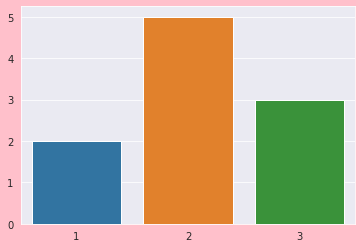

In [15]:
with sns.axes_style("darkgrid", rc = {'figure.facecolor': 'pink'}):
    sns.barplot(x=[1, 2, 3], y=[2, 5, 3])

OK。figureの背景がピンク色になった。これをさっきのdisplotと組み合わせれば良いはずで

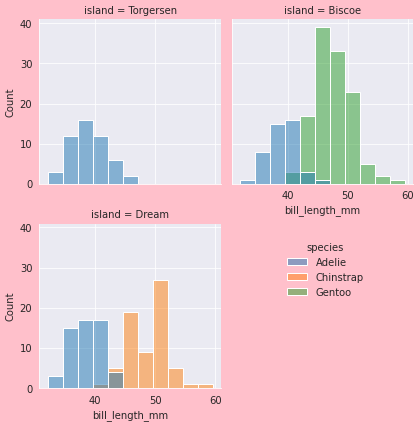

In [16]:
with sns.axes_style("darkgrid", rc = {'figure.facecolor': 'pink'}):
    g = sns.displot(
        penguins,
        x="bill_length_mm", hue="species",
        col="island", col_wrap=2, height=3,
    )
    sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45))
    
    
plt.savefig("aa.png")


はああーー??? 右側に余白がないじゃん。ヒストグラムのすぐそばにfigureの境界線があるじゃん。どうなってるの。  
ちなみに保存すると

<Figure size 432x288 with 0 Axes>

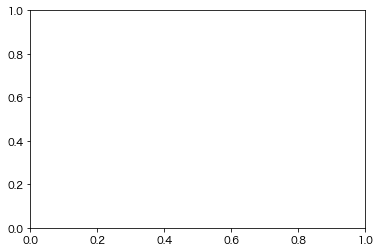

In [17]:
# https://www.haya-programming.com/entry/2018/10/11/131716

plt.figure(facecolor="azure", edgecolor="coral", linewidth=2)
fig, ax = plt.subplots()
